In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the datetime module from the datetime library.
from datetime import datetime

# Weather API Key
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Impeprial&appid=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Impeprial&appid=eec9a707f9a779d5b6765c629d18cc50


In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | omboue
Processing Record 2 of Set 1 | waipawa
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | ostrovnoy
Processing Record 8 of Set 1 | cherskiy
Processing Record 9 of Set 1 | port hardy
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | puerto madero
Processing Record 12 of Set 1 | naze
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | pisco
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | vyartsilya
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | tuktoyaktuk
Processing Record 20 of Set 1 | san patricio
Processing Record 21 of Set 1 | coquimbo
Processing Record 22 of Set 1 | inzer
Processing Record 23 of Set 1 | tuat

Processing Record 44 of Set 4 | hihifo
City not found. Skipping...
Processing Record 45 of Set 4 | kudahuvadhoo
Processing Record 46 of Set 4 | georgetown
Processing Record 47 of Set 4 | upernavik
Processing Record 48 of Set 4 | hukuntsi
Processing Record 49 of Set 4 | bom jesus
Processing Record 50 of Set 4 | cuenca
Processing Record 1 of Set 5 | constitucion
Processing Record 2 of Set 5 | anloga
Processing Record 3 of Set 5 | sao joao da barra
Processing Record 4 of Set 5 | sumbawa
City not found. Skipping...
Processing Record 5 of Set 5 | pailon
Processing Record 6 of Set 5 | yirol
City not found. Skipping...
Processing Record 7 of Set 5 | pemberton
Processing Record 8 of Set 5 | faanui
Processing Record 9 of Set 5 | terra santa
Processing Record 10 of Set 5 | dakar
Processing Record 11 of Set 5 | cap malheureux
Processing Record 12 of Set 5 | thaba nchu
Processing Record 13 of Set 5 | sataua
City not found. Skipping...
Processing Record 14 of Set 5 | tasiilaq
Processing Record 15 o

Processing Record 28 of Set 8 | yongan
Processing Record 29 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 30 of Set 8 | lemesos
City not found. Skipping...
Processing Record 31 of Set 8 | cramlington
Processing Record 32 of Set 8 | otofuke
Processing Record 33 of Set 8 | zeya
Processing Record 34 of Set 8 | beisfjord
Processing Record 35 of Set 8 | ancud
Processing Record 36 of Set 8 | hare bay
Processing Record 37 of Set 8 | kyzyl-suu
Processing Record 38 of Set 8 | carora
Processing Record 39 of Set 8 | hami
Processing Record 40 of Set 8 | tahoua
Processing Record 41 of Set 8 | valparaiso
Processing Record 42 of Set 8 | saint-francois
Processing Record 43 of Set 8 | marsa matruh
Processing Record 44 of Set 8 | bilibino
Processing Record 45 of Set 8 | easton
Processing Record 46 of Set 8 | elizabeth city
Processing Record 47 of Set 8 | san angelo
Processing Record 48 of Set 8 | havelock
Processing Record 49 of Set 8 | mys shmidta
City not found. Skipping...
Processi

Processing Record 16 of Set 12 | ellensburg
Processing Record 17 of Set 12 | scottsbluff
Processing Record 18 of Set 12 | denia
Processing Record 19 of Set 12 | chamba
Processing Record 20 of Set 12 | pochutla
Processing Record 21 of Set 12 | store heddinge
Processing Record 22 of Set 12 | camapua
Processing Record 23 of Set 12 | mangan
Processing Record 24 of Set 12 | wiefelstede
Processing Record 25 of Set 12 | southwick
Processing Record 26 of Set 12 | lorengau
Processing Record 27 of Set 12 | carikar
City not found. Skipping...
Processing Record 28 of Set 12 | namatanai
Processing Record 29 of Set 12 | tabou
Processing Record 30 of Set 12 | adamas
Processing Record 31 of Set 12 | vestmannaeyjar
Processing Record 32 of Set 12 | rumoi
Processing Record 33 of Set 12 | nam tha
City not found. Skipping...
Processing Record 34 of Set 12 | yerbogachen
Processing Record 35 of Set 12 | tocache
Processing Record 36 of Set 12 | egvekinot
Processing Record 37 of Set 12 | jijiga
Processing Reco

In [7]:
len(city_data)

564

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Omboue,-1.5746,9.2618,298.65,87,91,0.80,GA,2021-04-10 03:02:55
1,Waipawa,-41.4122,175.5153,293.15,68,90,10.80,NZ,2021-04-10 02:59:49
2,Kapaa,22.0752,-159.3190,297.15,64,20,7.20,US,2021-04-10 02:57:42
3,Albany,42.6001,-73.9662,288.15,62,90,4.63,US,2021-04-10 02:57:26
4,New Norfolk,-42.7826,147.0587,285.37,70,64,1.79,AU,2021-04-10 02:57:36
5,Punta Arenas,-53.1500,-70.9167,279.15,75,0,6.69,CL,2021-04-10 02:57:23
6,Ostrovnoy,68.0531,39.5131,274.00,89,96,14.61,RU,2021-04-10 02:58:15
7,Cherskiy,68.7500,161.3000,258.29,77,100,2.46,RU,2021-04-10 02:57:51
8,Port Hardy,50.6996,-127.4199,277.15,100,90,6.17,CA,2021-04-10 02:58:22
9,Rikitea,-23.1203,-134.9692,298.96,74,75,5.23,PF,2021-04-10 02:57:17


In [9]:
# Re-order columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Omboue,GA,2021-04-10 03:02:55,-1.5746,9.2618,298.65,87,91,0.80
1,Waipawa,NZ,2021-04-10 02:59:49,-41.4122,175.5153,293.15,68,90,10.80
2,Kapaa,US,2021-04-10 02:57:42,22.0752,-159.3190,297.15,64,20,7.20
3,Albany,US,2021-04-10 02:57:26,42.6001,-73.9662,288.15,62,90,4.63
4,New Norfolk,AU,2021-04-10 02:57:36,-42.7826,147.0587,285.37,70,64,1.79
5,Punta Arenas,CL,2021-04-10 02:57:23,-53.1500,-70.9167,279.15,75,0,6.69
6,Ostrovnoy,RU,2021-04-10 02:58:15,68.0531,39.5131,274.00,89,96,14.61
7,Cherskiy,RU,2021-04-10 02:57:51,68.7500,161.3000,258.29,77,100,2.46
8,Port Hardy,CA,2021-04-10 02:58:22,50.6996,-127.4199,277.15,100,90,6.17
9,Rikitea,PF,2021-04-10 02:57:17,-23.1203,-134.9692,298.96,74,75,5.23


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

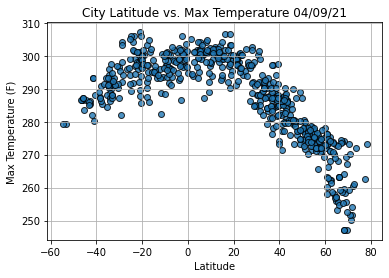

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

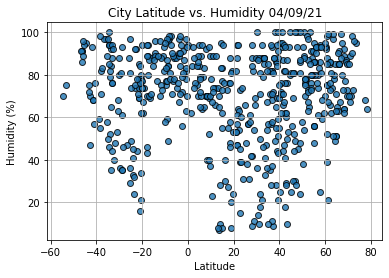

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

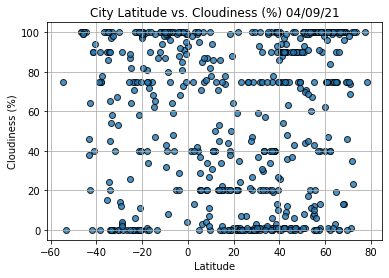

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

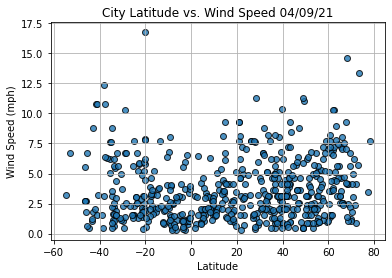

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

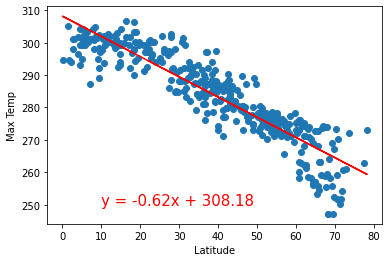

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,250))

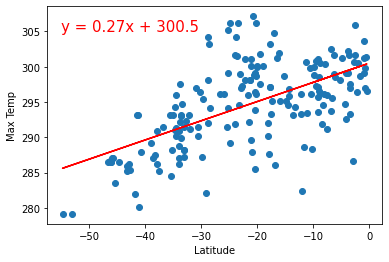

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-55,305))

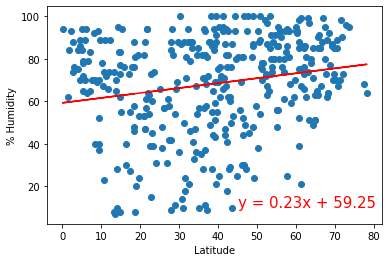

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,10))

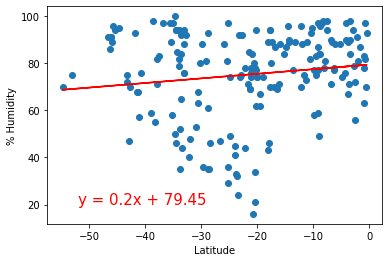

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-52,20))

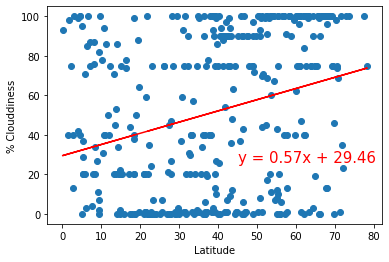

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Clouddiness',(45,26))

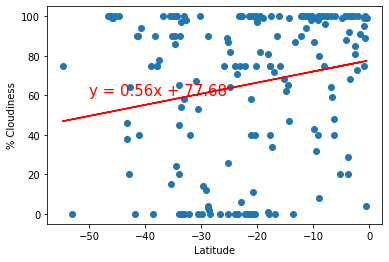

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

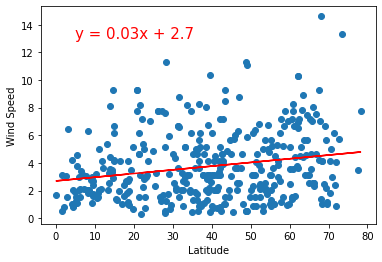

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(5,13))

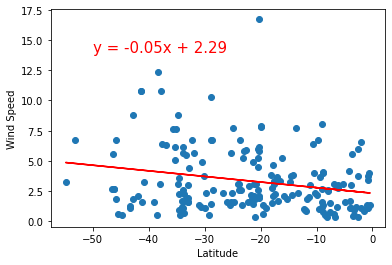

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,14))